### SARIMA (Seasonal Autoregressive Integrated Moving-Average) models are an extension of the ARIMA model that incorporates seasonal components into the model. SARIMA models are particularly useful for time series data exhibiting seasonal patterns.

Actual - Predicted value

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

In [2]:

# Generate sample time series data
np.random.seed(0)
dates = pd.date_range(start='2022-01-01', periods=365, freq='D')
seasonal_pattern = np.sin(np.arange(365) * np.pi / 6)  # Example seasonal pattern
noise = np.random.normal(loc=0, scale=0.1, size=len(dates))
series = 2 * seasonal_pattern + noise

# Create pandas DataFrame with explicitly set frequency
df = pd.DataFrame({'Value': series}, index=dates)
df.index.freq = 'D'  # Set the frequency to daily

In [3]:
# Train-test split
train_size = int(len(df) * 0.8)
train, test = df[:train_size], df[train_size:]

In [4]:
# Fit SARIMA model
order = (1, 1, 1)  # ARIMA order
seasonal_order = (1, 1, 1, 12)  # Seasonal order (12 for monthly data)
model = SARIMAX(train['Value'], order=order, seasonal_order=seasonal_order, enforce_stationarity=False, enforce_invertibility=False)
model_fit = model.fit(disp=False)


In [6]:
# Forecast
forecast = model_fit.forecast(steps=len(test))
forecast

2022-10-20    1.738249
2022-10-21    0.985726
2022-10-22   -0.011184
2022-10-23   -0.947293
2022-10-24   -1.770978
                ...   
2022-12-27    0.046343
2022-12-28    1.002612
2022-12-29    1.738094
2022-12-30    2.009497
2022-12-31    1.733273
Freq: D, Name: predicted_mean, Length: 73, dtype: float64

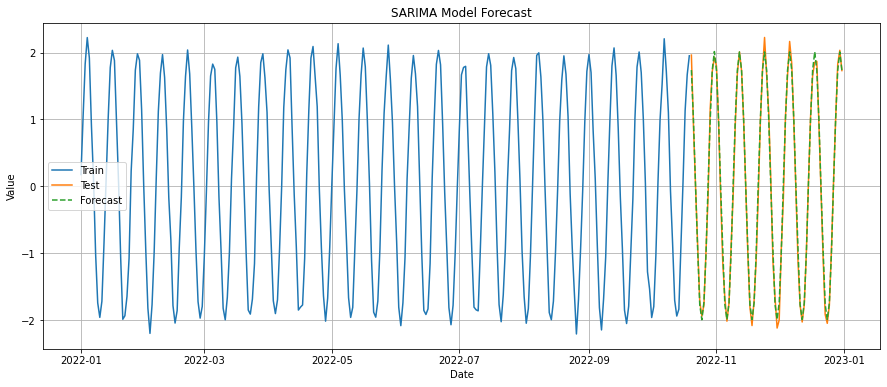

Mean Squared Error (MSE): 0.0102


In [8]:

# Visualize actual vs. predicted values
plt.figure(figsize=(15, 6))
plt.plot(train.index, train['Value'], label='Train')
plt.plot(test.index, test['Value'], label='Test')
plt.plot(test.index, forecast, label='Forecast', linestyle='--')
plt.title('SARIMA Model Forecast')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(test['Value'], forecast)
print('Mean Squared Error (MSE): {:.4f}'.format(mse))


## Explanation:
- We generate synthetic time series data with a seasonal pattern and add random noise.
- We split the data into training and test sets.
- We fit a SARIMA model to the training data using the SARIMAX class from statsmodels. We specify the non-seasonal and seasonal orders.
- We forecast future values using the fitted SARIMA model.
- We visualize the actual and predicted values using a line plot.
- We calculate the Mean Squared Error (MSE) to evaluate the accuracy of the forecasted values compared to the actual values.
This example demonstrates how to implement a basic SARIMA model in Python for time series forecasting. We can adjust the order parameters and seasonal_order parameters based on the characteristics of your data. Additionally, you may need to tune other parameters and perform diagnostics to ensure the model's adequacy.